In [222]:
pwd()

"/home/xlx0727/Scripts/Statistic/qgplsim"

# Start

In [356]:
# run this ceil if source codes was edited
include("DGP.ji")
include("qgplsim.ji")
using Statistics, LinearAlgebra
using LaTeXStrings

import Base.Threads.@threads

# QGPLSIM fitting

In [369]:
# run this ceil for different data sets

α = [1.0, -0.5] # single index for x
θ = [1.0, 2.0] # linear for x, <α, θ> = 0 for identification
γ = [0.001, 0.5] # single index for z
β = [0.5, -1.0] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
fx = 2 # y = f(x), fx for different f(x)     
                # fx = 1, y = X*θ + Z*β + (X*α + Z*γ .- 1).^2 + 0.2ϵ
                # fx = 2, y = X*θ + Z*β + log.(1 .+ exp.(X*α + Z*γ .- 1)) + 0.2ϵ

ifz = true # if false, Z = 0, i.e. no category varible
dist = 1 # 0 for gauss, 1 for Cauchy
X, Z, y = dgp(n, γ, θ, α, β, fx, dist,  ifz)
# p = length(α)
# q = length(γ)
τ = 0.5

# Estimation 

model1 = qgplsim.model(X, Z, y, τ)
alpha_type = 1
# different weight of sum on alpha 
# 0 for true alpha, using α in DGP
# 1 for global: ∑ij sum(Bi - Bj) / n;
# 2 for local: ∑z ∑ij (bzi - bzj) * nz / n;
# when Z = 0, global == local
@time alpha, theta, gamma, beta = qgplsim.estimator(model1, alpha_type)
coefa = 1 #/ alpha[1]
coefg = 1 #/ gamma[1]
println("Estimation of index coefs: ")
println("̂α => ", coefa * alpha)
println("̂γ => ", gamma)

println("Estimation of linear coefs: ")
println("̂θ => ", theta)
println("̂β => ", beta)

# theta * alpha

  3.948757 seconds (3.49 M allocations: 11.253 GiB, 45.65% gc time)
Estimation of index coefs: 
̂α => [0.9757715583372923, -0.21879183243442163]
̂γ => [0.0013597083505795474, 0.8082338747679054]
Estimation of linear coefs: 
̂θ => [0.4504721150487661 2.0090232473389014]
̂β => [0.13270697511747076, -1.6462816275243621]


In [368]:
70^(-0.2)

0.4275435825099656

# Paths of $g(x \alpha + z \gamma)$ and $\nabla g$

$\alpha = \hat{\alpha}$,
$z \in S_z$

In [242]:
using Plots
# include("qgplsim.ji")

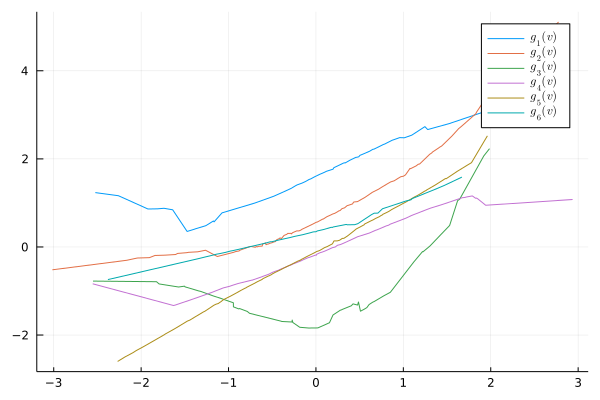

In [297]:

v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
categ, index = model1.categ, model1.index
g, dg = qgplsim.Gz_DGz(v, Z, y, -0.15) # g: g(v), dg: g'(v)
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

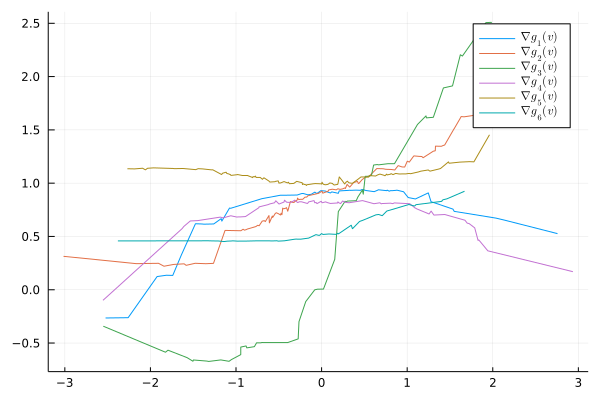

In [298]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end
fig

# Monte Carlo Simulation

In [341]:
Threads.nthreads()

6

In [411]:
include("MonteCarloSIM.ji")

simulation (generic function with 2 methods)

In [437]:
α = [1.0, 0.5] # single index for x
θ = [1.0, -2.0]  # linear for x, <α, θ> = 0 for identification
γ = [1.001, 0.5] # single index for z
β = [1.0, -0.5] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)
n = 500
fx = 2
dist = 1 # Cauchy
len = 200
alpha_type = 1

1

In [ ]:
res, Alpha, Gamma = MonteCarlo(n, γ, θ, α, β, fx, dist, len, alpha_type)


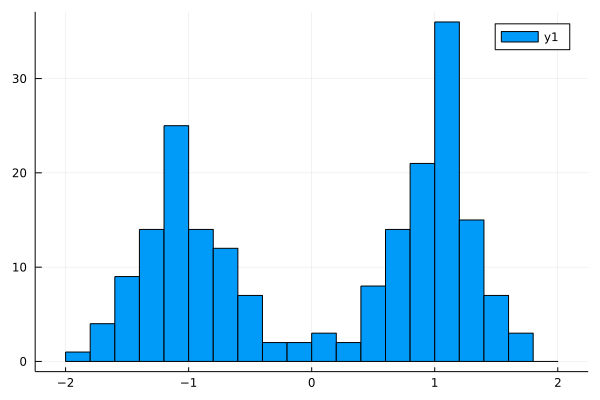

In [439]:
histogram(Gamma[:,1], bins = -2:0.2:2)

In [419]:
using Clustering

In [440]:
Rg = kmeans(transpose(Gamma), 2)
Rg.centers

2×2 Matrix{Float64}:
 0.998989  -1.03754
 0.504797  -0.451609

In [441]:
Ra= kmeans(transpose(Alpha), 2)
Ra.centers

2×2 Matrix{Float64}:
 -0.768134  0.730203
 -0.328109  0.383512

In [447]:
alpha = sum(abs.(Ra.centers), dims = 2)
alpha ./ alpha[1]

2×1 Matrix{Float64}:
 1.0
 0.4749399169772209

In [351]:
using DataFrames
df = DataFrame(α1 = Float64[], α2 = Float64[],
               var_α1 = Float64[], var_α2 = Float64[],    
               θ1 = Float64[], θ2 = Float64[],
               var_θ1 = Float64[], var_θ2 = Float64[], 
               β1 = Float64[], β2 = Float64[],
               var_β1 = Float64[], var_β2 = Float64[], 
               γ1 = Float64[], γ2 = Float64[],
               var_γ1 = Float64[], var_γ2 = Float64[])


,α1,α2,var_α1,var_α2,θ1,θ2,var_θ1,var_θ2,β1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64


In [340]:
A = [:α1, :α2, :var_α1, :var_α2]
T = [:θ1, :θ2, :var_θ1, :var_θ2]
G = [:γ1, :γ2, :var_γ1, :var_γ2]
B = [:β1, :β2, :var_β1, :var_β2]

4-element Vector{Symbol}:
 :β1
 :β2
 :var_β1
 :var_β2

In [ ]:
@threads for γ in [[1.0, 0.5], [1.0, 0.001], [0.001, 1.0], [0.5, 1.0],[0.5, 0.5], [0.0001, 0.0001]]
    res, =  MonteCarlo(n, γ, θ, α, β, fx, dist, len, alpha_type)
    push!(df, res)
end